In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

In [42]:
from google.colab import files
files.upload()


Saving data_trial.csv to data_trial (1).csv


{'data_trial.csv': b'Gender,AGE,TEMP,SPO2,PULSE,IR\r\nFemale,26,100,92,109,1\r\nFemale,23,96,93,109,0\r\nMale,26,96,93,72,1\r\nFemale,24,103,93,121,0\r\nMale,48,100,85,80,1\r\nMale,24,103,86,45,1\r\nMale,45,100,94,80,1\r\nMale,48,100,92,109,1\r\nMale,26,101,85,70,1\r\nMale,26,97,94,113,1\r\nMale,26,102,93,68,1\r\nMale,30,98,86,109,1\r\nMale,36,100,92,45,1\r\nMale,36,96,85,121,1\r\nMale,26,100,93,69,1\r\nFemale,54,100,92,76,1\r\nFemale,41,97,87,71,1\r\nMale,48,96,93,70,1\r\nMale,26,96,93,109,0\r\nFemale,54,100,86,121,1\r\nMale,26,97,93,69,1\r\nFemale,26,102,93,69,1\r\nFemale,47,97,93,106,1\r\nFemale,49,96,92,50,0\r\nMale,57,96,85,121,1\r\nFemale,47,100,92,72,1\r\nMale,29,100,93,120,1\r\nFemale,30,103,93,80,1\r\nFemale,26,96,93,71,0\r\nMale,35,100,94,60,1\r\nMale,26,103,93,109,1\r\nFemale,46,100,86,70,0\r\nMale,47,103,94,69,1\r\nMale,29,96,95,121,1\r\nMale,66,100,91,109,1\r\nFemale,63,99,93,121,1\r\nMale,59,100,93,109,1\r\nFemale,26,100,93,70,1\r\nFemale,72,100,84,109,1\r\nMale,57,96,93,

In [43]:
data=pd.read_csv('data_trial.csv')

In [44]:
data

,Gender,AGE,TEMP,SPO2,PULSE,IR
0,Female,26,100,92,109,1
1,Female,23,96,93,109,0
2,Male,26,96,93,72,1
3,Female,24,103,93,121,0
4,Male,48,100,85,80,1
...,...,...,...,...,...,...
2400,Male,65,103,93,109,1
2401,Male,26,96,84,109,1
2402,Female,39,100,94,70,1
2403,Male,38,100,83,69,1


In [45]:
data.loc[(data.SPO2.between(92,100)) & (data.TEMP.between(96,99)) & (data.PULSE.between(60,100)),"Covid"]=0 

In [46]:
data

,Gender,AGE,TEMP,SPO2,PULSE,IR,Covid
0,Female,26,100,92,109,1,NaN
1,Female,23,96,93,109,0,NaN
2,Male,26,96,93,72,1,0.0
3,Female,24,103,93,121,0,NaN
4,Male,48,100,85,80,1,NaN
...,...,...,...,...,...,...,...
2400,Male,65,103,93,109,1,NaN
2401,Male,26,96,84,109,1,NaN
2402,Female,39,100,94,70,1,NaN
2403,Male,38,100,83,69,1,NaN


In [47]:
data['Covid'].fillna(1.0,inplace = True)

In [48]:
data['Covid'].value_counts()

1.0    2152
0.0     253
Name: Covid, dtype: int64

In [49]:
X = data[['TEMP', 'SPO2', 'PULSE']]
y = data['Covid']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [52]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [53]:
classifier.score(X_train, y_train) #Training Accuracy

0.988116458704694

In [54]:
classifier.score(X_test, y_test) #Testing Accuracy

0.9916897506925207

In [55]:
classifier.score(X, y) #overall processed data

0.9891891891891892

In [56]:
y_pred= classifier.predict(X_test) 

In [57]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

In [58]:
cm

array([[ 72,   4],
       [  2, 644]])

In [59]:
print("no of Covid-19 Parameters  data", len(X_train))
print("no of Actual Corona Patients detected", len(X_test))
print("no of Covid-19 Parameter training data", len(y_train))
print("no of Covid_Patient Detected By Model ", len(y_test))

no of Covid-19 Parameters  data 1683
no of Actual Corona Patients detected 722
no of Covid-19 Parameter training data 1683
no of Covid_Patient Detected By Model  722


In [60]:
from sklearn.metrics import classification_report

In [61]:
y_fin=y_pred.tolist()


In [62]:
fin_co=data['Covid'].tolist()

In [63]:
len(fin_co)

2405

In [64]:
len(y_fin)

722

In [65]:
nf_fin= fin_co[0:722]


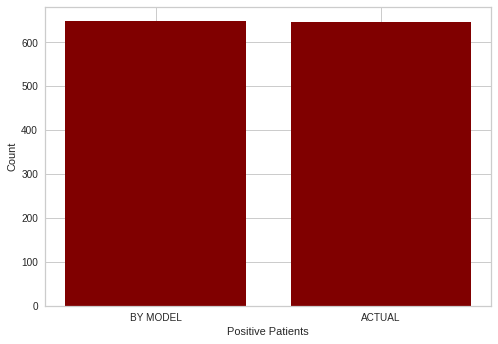

In [66]:
data_bar = {'BY MODEL':y_fin.count(1), 'ACTUAL':nf_fin.count(1)}
detect = list(data_bar.keys())
value = list(data_bar.values())
plt.xlabel("Positive Patients")
plt.ylabel("Count")
plt.bar(detect,value, color ='maroon', width = 0.8)
plt.show()

In [67]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        76
         1.0       0.99      1.00      1.00       646

    accuracy                           0.99       722
   macro avg       0.98      0.97      0.98       722
weighted avg       0.99      0.99      0.99       722



In [68]:
actual_status=data['Covid']

In [69]:
actual_status=actual_status[0:722]

In [70]:
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
import plotly.express as px

fpr, tpr, thresholds = roc_curve(actual_status, y_pred)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

0.9916897506925207

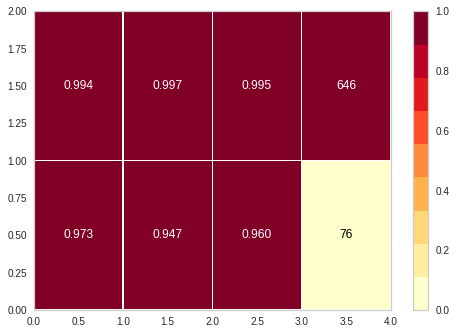

In [71]:

from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.model_selection import TimeSeriesSplit

# Specify the target classes
classes = ["Corona-Positive ", "Corona-Negative"]

# Create the training and test data
tscv = TimeSeriesSplit()

visualizer = ClassificationReport(classifier, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data


In [32]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [72]:
import wandb


In [73]:
labels=("Positive","Negative")

In [36]:
wandb.init(project="visualize-sklearn")

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [35]:
pip install wandb

     |████████████████████████████████| 1.8MB 2.8MB/s 
     |████████████████████████████████| 133kB 19.1MB/s 
     |████████████████████████████████| 102kB 7.5MB/s 
     |████████████████████████████████| 174kB 19.2MB/s 
     |████████████████████████████████| 71kB 7.0MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=2354290d482271872e93eeb35f33583215c9e71088e43871c506c51493a27014
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=cd0c471b395a086a5eb3f898aacc6c650cd58896d56532e4f005dfa918700be1
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

In [ ]:
labels=("Covid-Positive","Covid-Negative")

In [ ]:
wandb.sklearn.plot_classifier(clf, X_train, X_test, y_train, y_test, y_pred, labels,
                                                         model_name='SVC', feature_names=None)

# Visualize all the plots in the Regression section below with one line of code
wandb.sklearn.plot_regressor(logmodel, X_train, X_test, y_train, y_test,  model_name='Ridge')

# Visualize all the plots in the Clustering section below with one line of code
wandb.sklearn.plot_clusterer(classifier, X_train, cluster_labels, labels,model)

In [39]:
wandb.sklearn.plot_confusion_matrix(actual_status,y_pred, labels)

In [ ]:
wandb.sklearn.plot_confusion_matrix(actual_status,y_pred, labels)


In [38]:
labels=("Positive","Negative")

In [40]:
wandb.init(project="visualize-sklearn")

_runtime,38
_timestamp,1622285890
_step,0


_runtime,▁
_timestamp,▁
_step,▁


In [ ]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix
classes = ['Corona-Postive', 'Corona-Negative']
visualizer = ClassificationReport(classifier, classes=classes)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()